# WSI
## Raport z ćwiczenia laboratoryjnego nr 5
### Kacper Bugała, 303739 i Jan Kuc, 303753

### 1. Cel eksperymentów

Zadanie polega na implementacji perceptronu wielowarstwowego oraz wybrangeo algorytmu optymalizacji gradientowej z algorytem propagacji wstecznej. Następnie nalezy wytrenować stworzoną sieć do klasyfikacji odręcznie pisanych cyfr ze zbioru MNIST oraz sprawdzić efekty działania.

### 2. Decyzje projektowe

Do implementacji perceptronu wielowarstwowego stworzono uniwersalną klasę **Network**, która korzysta z pomocniczej klasy **Layer**, dzięki czemu mozna zdefiniować dowolną liczbę warstw ukrytych sieci, podając równiez funkcję aktywacji oraz liczbę neuronów w warstwach ukrytych.

Ostatecznie zdecydowano się na trening oraz testowanie sieci składającej się z 3 warstw ukrytych aktywowanych funkcją *ReLu*. Funkcją aktywacji warstwy wyjściowej jest *softmax*. Funkcja ta, doskonale nadaje się do zadań klasyfikacji wieloklasowej i jest potrzebna do normalizacji wyników na końcu sieci. Dzięki niej na wyjściu otrzymujemy tak naprawdę głosowanie modelu na kazdą z mozliwych klas, a więc ocenione przez model prawdopodobieństwo przynalezności podanego przykładu wejściowego do danej klasy.

Jako algorytm opytmalizacji gradientowej wybrano **Mini-batch SGD** (SGD - Stochastic Gradient Descent). Trening modelu podzielony jest na określoną w parametrach wejśiowych liczbę **epok**, a w skład kazdej epoki wchodzą iteracje, których liczba jest zalezna od podanego w parametrach rozmiaru paczki, tzw. **batch size**.
Metoda podziału danych na losowe paczki w trakcie uczenia ma na celu przyspieszenie uczenia, poniewaz w takim przypadku w kazdej iteracji przez siec "przechodzi" tylko mały fragment danych wejściowych. Im większy rozmiar paczki, tym obliczenia są dluzsze, bo wykonywane na większych rozmiarach macierzy i więcej parametrów do aktualizowania w kazdej iteracji.

W celu ulepszenia stosowanej metody optymalizacji gradientowej dodano jeszcze tzw. *momentum* na etapie aktualizacji parametrów (wag i biasów). W takim wypadku, aktualizacja parametrów zamiast:
- **parametr -= learning_rate * gradient**,

przebiega według wzorów:

- **v_gradient = (momentum * v_gradient) + (1 - momentum) * gradient**,
-  **parametr -= learning_rate * v_gradient**.

Takie rozwiązanie daje lepszą jakość modelu.

Ostatecznie wybrano następujące parametry sieci:
- batch_size = 64
- learning rate = 0.1
- momentum = 0.9
- liczba epok = 1000
- liczba warstw = 3
- liczba neuronów w warstwach ukrytych = 32

### 3. Opis eksperymentów

W ramach eksperymentów, sieć zainicjowano odpowiednimi (wybranymi i opisanymi wcześniej) parametrami, takimi jak: liczba warstw ukrytych, liczba neuronów w tych warstwach, funkcja aktywacji warstw ukrytch, funkcja aktywacji warstwy wyjściowej, współczynnik szybkości uczenia (learning_rate) oraz współczynnik momentum.

Następnie dla tak zainicjowanej sieci, przeprowadzono trening modelu, wywołując metodę *fit()* dla wybranej liczby epok, rozmiaru paczki (batch_size) oraz danych treningowych i walidacyjnych.

Do treningu, zgodnie z poleceniem wykorzystano zbiór MNIST. Ewaluacja modelu następowała po kazdej epoce, wartości **accuracy** oraz **loss** były zapisywane i po zakończeniu treningu, ich zmiany zostały przedstawione w formie wykresów.

Stworzona takze metodę *test_prediction*, która pozwala na sprawdzenie poprawności predykcji wybranej próbki z podanego zestawu danych, wraz z wyświetleniem tej próbki.

Na koniec, precyzję oraz stratę wytrenowanego modelu sprawdzono, ewaluując model na wydzielonym wcześniej zbiorze testowym

### 4. Eksperymenty

In [8]:
import sys
sys.path.append('../src/')
from network import Network
from data_reader import DataReader
from supporting_methods import ReLu, softmax, sigmoid
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dataset = load_digits()

digits_data = dataset["data"]

digits_labels = dataset["target"]

In [10]:
data_reader = DataReader(data=digits_data, labels=digits_labels)

train_data, train_labels, test_data, test_labels, valid_data, valid_labels = data_reader.split_data()

In [11]:
input_size = train_data.shape[1]
input_size

64

In [12]:
output_size = train_labels.shape[1]
output_size

10

In [13]:
net = Network(hidden_count=3,
              hidden_size=32,
              hidden_act_fun=ReLu,
              output_act_fun=softmax,
              learning_rate=0.1,
              momentum=0.9)

In [14]:
train_accs, train_losses, valid_accs, valid_losses = net.fit(
        epochs=1000,
        batch_size=32,
        train_data=train_data,
        train_labels=train_labels,
        valid_data=valid_data,
        valid_labels=valid_labels)

Epoch 1/1000
Train data accuracy: 6.03%
train loss: 1.0695
Valid data accuracy: 8.89%
valid loss: 1.0525
---------------------------------------------------------
Epoch 2/1000
Train data accuracy: 6.12%
train loss: 1.0484
Valid data accuracy: 10.00%
valid loss: 1.0313
---------------------------------------------------------
Epoch 3/1000
Train data accuracy: 7.14%
train loss: 1.0329
Valid data accuracy: 11.11%
valid loss: 1.0165
---------------------------------------------------------
Epoch 4/1000
Train data accuracy: 7.88%
train loss: 1.0199
Valid data accuracy: 10.83%
valid loss: 1.0045
---------------------------------------------------------
Epoch 5/1000
Train data accuracy: 8.35%
train loss: 1.0092
Valid data accuracy: 11.11%
valid loss: 0.9946
---------------------------------------------------------
Epoch 6/1000
Train data accuracy: 8.53%
train loss: 1.0004
Valid data accuracy: 11.67%
valid loss: 0.9866
---------------------------------------------------------
Epoch 7/1000
Trai

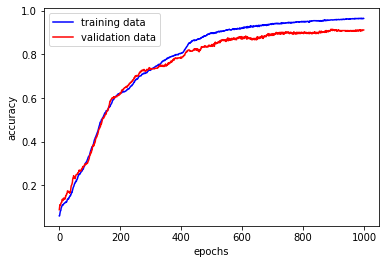

In [20]:
plt.figure()
plt.plot(range(len(train_accs)), train_accs, 'b', label='training data')
plt.plot(range(len(valid_accs)), valid_accs, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Powyższy wykres pokazuje wzrost dokładności w kolejnych epokach uczenia.

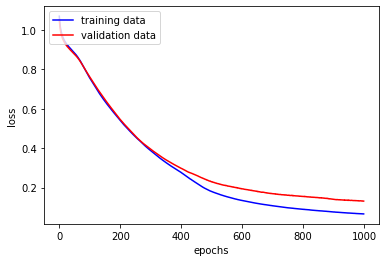

In [16]:
plt.figure()
plt.plot(range(len(train_losses)), train_losses, 'b', label='training data')
plt.plot(range(len(valid_losses)), valid_losses, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Powyżej wykres minimalizowanej wartości funkcji straty

### Ocena modelu na zbiorze testowym

In [17]:
net.evaluate(test_data, test_labels, "test")

Test data accuracy: 91.09%
test loss: 0.1201


(0.9108635097493036, 0.1201354735897054)

### Metoda do sprawdzania pojedynczych przykładów ze zbioru

Prediction:  [4]
[0 0 0 0 1 0 0 0 0 0]
Label:  4


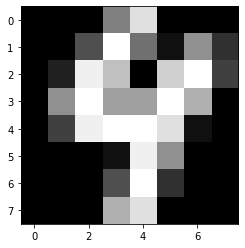

In [18]:
net.test_prediction(test_data, test_labels, 89)

### 5. Wnioski

Ostatecznie udało się uzyskać precyzję **91.1%** oraz stratę na poziomie **0.1201** na zbiorze testowym, gdzie precyzja to liczba poprawnie przewidzianych przykładów podzielona na całkowitą liczbę przykładów branych pod uwagę podczas ewaluacji, natomiast strata była liczona jako średnia sumy kwadratów błędów.

Zapewne, mozliwe było uzyskanie lepszej jakości modelu, jeśli wybranoby inną metodą inicjalizacji wag i biasów, co jest dosyć istotną kwestią jeśli chodzi o trening sieci.

Na wykresach prezentujących zmianę precyzji i straty w kolejnych epokach, widać, ze z epoki na epokę mamy do czynienia raczej z poprawą modelu. Na przebiegach pokazane są zmiany zarówno dla zbioru treningowego jak i walidacyjnego, dzięki temu mozna stwierdzić, ze nie występuje przetrenowanie modelu.